# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Fadli Tambunan
- **Email:** ahmadfadlitambunan12@gmail.com
- **ID Dicoding:** aftambunan

## Menentukan Pertanyaan Bisnis

- Berapa jumlah pinjaman sepeda pada Senin-Minggu?
- Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
- Bagaimana pengaruh holiday, working day, dan weekend terhadap jumlah peminjaman sepeda?
- Berapa rasio perbandingan antara casual user dan registered user?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Mengimport dataset yang akan digunakan untuk analisis. Dataset yang di-import adalah `day.csv` yang merupakan dataset `bike sharing` berdasarkan hari.

In [2]:
# import dataset
day_df = pd.read_csv('./data/day.csv')

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Melihat apakah dataset kredibel atau tidak dengan mengecek `missing value, duplicated row, invalid value, dan sebagainya`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari informasi dataset, tidak terdapat missing value dari semua kolom yang ada.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari kode di atas juga dapat dipastikan memang dataset tersebut memang tidak ada missing value. Oleh karena itu, missing value bisa kita skip.

In [6]:
# cek data duplikat
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


Dataset yang digunakan juga tidak memiliki data yang duplikat, jadi bisa masalah ini bisa di-skip

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari informasi di atas terdapat tipe variable yang tidak sesuai dengan value-nya, yaitu pada kolom `dteday`. Kolom tersebut menyimpan nilai berupa tanggal namun bertipekan variable `object`/`string`. Oleh karena itu, tipe variabel `dteday` bisa diubah ke `datetime`.

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dari informasi di atas juga tidak ada keaneha pada nilai kolom numerik. Oleh karena itu, tidak ada masalah `inaccurate value` pada dataset.

### Cleaning Data

Merubah tipe data pada kolom `dteday` dari `object` ke `datetime`.

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Karena dataset juga sudah bersih, untuk tahap cleaning cukup sampai di sini saja.

## Exploratory Data Analysis (EDA)

### Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda

In [10]:
# Copy dataframe utama ke dataframe temporary
temp_df = day_df.copy()

# Melakukan mapping dan rename kolom untuk output lebih jelas
temp_df['weathersit'] = temp_df['weathersit'].map({
    1 : 'Cerah',
    2 : 'Berkabut',
    3 : 'Hujan Ringan',
    4 : 'Hujan Lebat'
})

# Membuat pivot table weathersit
pivot_table_by_season = temp_df.groupby(by='weathersit').agg({
    'cnt':'sum'
}).reindex(['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'], fill_value = 0).reset_index()

# mengatur format output
pd.options.display.float_format = '{:.2f}'.format

print("Rata-rata Jumlah Peminjaman Berdasarkan Cuaca :")
print(pivot_table_by_season.to_string(index=False))

Rata-rata Jumlah Peminjaman Berdasarkan Cuaca :
  weathersit     cnt
       Cerah 2257952
    Berkabut  996858
Hujan Ringan   37869
 Hujan Lebat       0


Dari informasi di atas, saat hujan lebat tidak ada satupun yang melakukan peminjaman sepeda yang mana merupakan yang hal yang wajar. Untuk cuaca terbaik untuk meminjam sepeda adalah saat cuaca sedang cerah.

### Pengaruh Holiday, Weekday/Working Day, dan Weekend Terhadap Jumlah Peminjaman Sepeda

In [11]:
# Copy dataframe utama ke dataframe temporary
temp_df = day_df.copy()

# Membuat kolom baru untuk weekend atau tidak
temp_df['weekend'] = temp_df['weekday'].apply(lambda x: 'Tidak' if x in [1,2,3,4,5] else 'Ya')
temp_df['weekend']

# Melakukan mapping untuk output lebih jelas
temp_df['holiday'] = temp_df['holiday'].map({
    0 : 'Ya',
    1 : 'Tidak'
})

temp_df['weekday'] = temp_df['weekday'].map({
    0 : 'Minggu',
    1 : 'Senin',
    2 : 'Selasa',
    3 : 'Rabu',
    4 : 'Kamis',
    5 : 'Jum\'at',
    6 : 'Sabtu'
})

temp_df['workingday'] = temp_df['workingday'].map({
    1 : 'Ya',
    0 : 'Tidak'
})


# Membuat pivot table
pivot_table_by_holiday = temp_df.groupby(by='holiday').agg({
    'cnt':'sum'
}).reset_index()

pivot_table_by_day = temp_df.groupby(by='weekday').agg({
    'cnt' : 'sum'
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jum\'at', 'Sabtu', 'Minggu']).reset_index()

pivot_table_by_working_day = temp_df.groupby(by='workingday').agg({
    'cnt' : 'sum'
}).reset_index()

pivot_table_by_weekend_weekday = temp_df.groupby(by='weekend').agg({
    'cnt' :'sum'
}).reset_index()

# mengatur format output
pd.options.display.float_format = '{:.2f}'.format

print("Jumlah Peminjaman Berdasarkan Holiday :")
print(pivot_table_by_holiday.to_string(index=False))
print("\n============================================================\n")
print("Jumlah Peminjaman Berdasarkan Hari :")
print(pivot_table_by_day.to_string(index=False))
print("\n============================================================\n")
print("Jumlah Peminjaman Berdasarkan Hari Kerja :")
print(pivot_table_by_working_day.to_string(index=False))
print("\n============================================================\n")
print("Jumlah Peminjaman Berdasarkan Weekend dan Weekday:")
print(pivot_table_by_weekend_weekday.to_string(index=False))

Jumlah Peminjaman Berdasarkan Holiday :
holiday     cnt
  Tidak   78435
     Ya 3214244


Jumlah Peminjaman Berdasarkan Hari :
weekday    cnt
  Senin 455503
 Selasa 469109
   Rabu 473048
  Kamis 485395
 Jum'at 487790
  Sabtu 477807
 Minggu 444027


Jumlah Peminjaman Berdasarkan Hari Kerja :
workingday     cnt
     Tidak 1000269
        Ya 2292410


Jumlah Peminjaman Berdasarkan Weekend dan Weekday:
weekend     cnt
  Tidak 2370845
     Ya  921834


### Perbandingan Casual User dan Registered User

In [12]:
# Mencari Total Jumlah User
sum_casual = day_df['casual'].sum()
sum_registered = day_df['registered'].sum()

# Hitung persentase
persentase_casual = (sum_casual/(sum_casual + sum_registered)) * 100
# persentase_registered = ((sum_casual + sum_registered)/sum_registered) * 100

# buat tabel pivot
df = pd.DataFrame({
    'Tipe User' : ['Casual', 'Registered'],
    'Jumlah Peminjaman' : [sum_casual, sum_registered],
    'Persentase (%)': [persentase_casual, 100-persentase_casual]
})

# print output
print("Perbandingan Jenis User Casual dan Registered :\n")
print(df.to_string(index=False))

Perbandingan Jenis User Casual dan Registered :

 Tipe User  Jumlah Peminjaman  Persentase (%)
    Casual             620017           18.83
Registered            2672662           81.17


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa total rental sepeda dari Senin-Minggu?

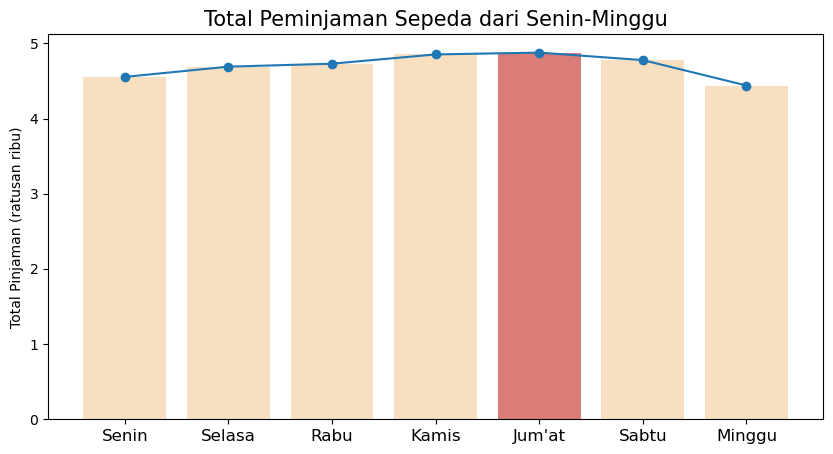

In [13]:
temp_df = day_df.copy()

temp_df['weekday'] = temp_df['weekday'].map({
    0 : 'Minggu',
    1 : 'Senin',
    2 : 'Selasa',
    3 : 'Rabu',
    4 : 'Kamis',
    5 : 'Jum\'at',
    6 : 'Sabtu'
})

colors = ["#f5d7b0", "#f5d7b0", "#f5d7b0",  "#f5d7b0","#d15b56", "#f5d7b0", "#f5d7b0"]
by_day_df = temp_df.groupby(by='weekday').agg({
    'cnt' : 'sum'
}).reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jum\'at', 'Sabtu', 'Minggu']).reset_index()


plt.figure(figsize=(10, 5))

# membuat data
days = [x for x in by_day_df['weekday']]
total = [y/100000 for y in by_day_df['cnt']]

# membuat plot bar
plt.bar(days, total, color = colors, width=0.8, alpha=0.8)
plt.plot(days, total)
plt.scatter(days, total)

plt.title("Total Peminjaman Sepeda dari Senin-Minggu", loc="center", fontsize=15)
plt.ylabel("Total Pinjaman (ratusan ribu)")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana cuaca mempengaruh jumlah peminjaman sepeda?

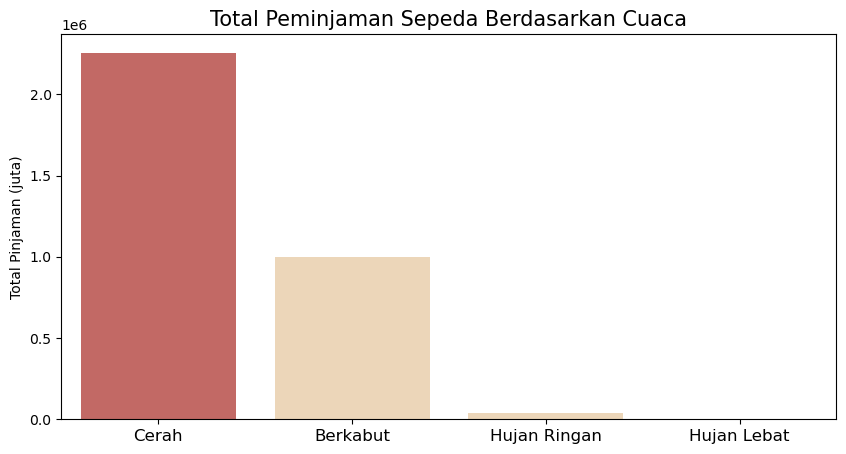

In [14]:
# Copy dataframe utama ke dataframe temporary
temp_df = day_df.copy()

# Melakukan mapping dan rename kolom untuk output lebih jelas
temp_df['weathersit'] = temp_df['weathersit'].map({
    1 : 'Cerah',
    2 : 'Berkabut',
    3 : 'Hujan Ringan',
    4 : 'Hujan Lebat'
})

# Membuat pivot table weathersit
by_weather_df = temp_df.groupby(by='weathersit').agg({
    'cnt':'sum'
}).reindex(['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'], fill_value = 0).reset_index()

plt.figure(figsize=(10, 5))

colors = ["#d15b56", "#f5d7b0", "#f5d7b0", "#f5d7b0"]

# membuat plot bar
sns.barplot(x = by_weather_df['weathersit'], y = by_weather_df['cnt'], palette = colors)

plt.title("Total Peminjaman Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Total Pinjaman (juta)")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh holiday, working day, dan weekend terhadap jumlah peminjaman sepeda?

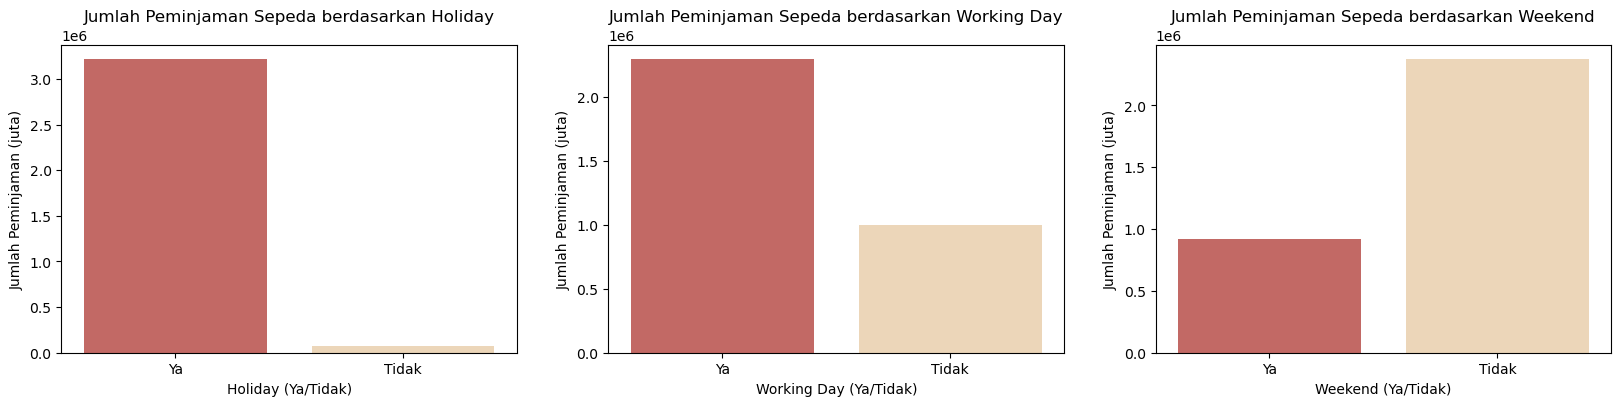

In [15]:
# Copy dataframe utama ke dataframe temporary
temp_df = day_df.copy()
    
# Membuat kolom baru untuk weekend atau tidak
temp_df['weekend'] = temp_df['weekday'].apply(lambda x: 'Tidak' if x in [1,2,3,4,5] else 'Ya')
temp_df['weekend']

# Melakukan mapping untuk output lebih jelas
temp_df['holiday'] = temp_df['holiday'].map({
    0 : 'Ya',
    1 : 'Tidak'
})

temp_df['workingday'] = temp_df['workingday'].map({
    1 : 'Ya',
    0 : 'Tidak'
})


# Membuat pivot table
pivot_table_by_holiday = temp_df.groupby(by='holiday').agg({
    'cnt':'sum'
}).reindex(['Ya', 'Tidak']).reset_index()

pivot_table_by_weekend = temp_df.groupby(by='weekend').agg({
    'cnt' :'sum'
}).reindex(['Ya', 'Tidak']).reset_index()

pivot_table_by_working_day = temp_df.groupby(by='workingday').agg({
    'cnt' : 'sum'
}).reindex(['Ya', 'Tidak']).reset_index()

# membuat visualisasi
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 4))
colors = ["#d15b56","#f5d7b0"]

# visualisasi holiday
sns.barplot(x = 'holiday', y = 'cnt', data = pivot_table_by_holiday, palette=colors, ax = ax1)
ax1.set_title("Jumlah Peminjaman Sepeda berdasarkan Holiday")
ax1.set_xlabel("Holiday (Ya/Tidak)")
ax1.set_ylabel("Jumlah Peminjaman (juta)")

# visualisasi weekend
sns.barplot(x = 'workingday', y = 'cnt', data = pivot_table_by_working_day, palette=colors, ax=ax2)
ax2.set_title("Jumlah Peminjaman Sepeda berdasarkan Working Day")
ax2.set_xlabel("Working Day (Ya/Tidak)")
ax2.set_ylabel("Jumlah Peminjaman (juta)")

# visualisasi weekend
sns.barplot(x = 'weekend', y = 'cnt', data = pivot_table_by_weekend, palette=colors, ax=ax3)
ax3.set_title("Jumlah Peminjaman Sepeda berdasarkan Weekend")
ax3.set_xlabel("Weekend (Ya/Tidak)")
ax3.set_ylabel("Jumlah Peminjaman (juta)")
plt.show()


### Pertanyaan 4: Berapa Perbandingan Rasio antara Pengguna `Casual` dan `Registered`?

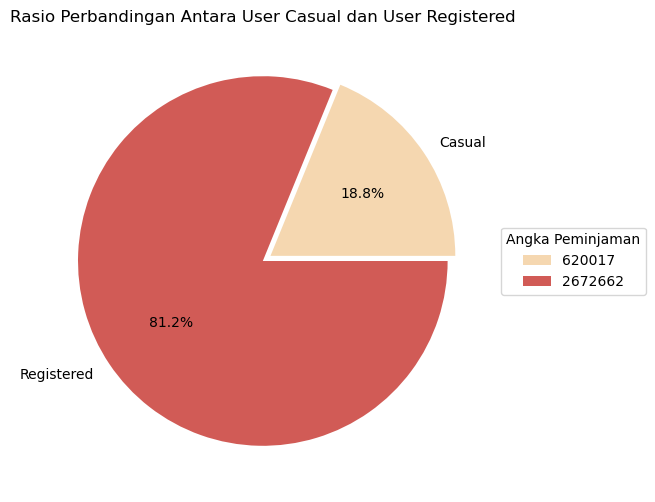

In [16]:
# Mencari Total Jumlah User
sum_casual = day_df['casual'].sum()
sum_registered = day_df['registered'].sum()

# Hitung persentase
persentase_casual = (sum_casual/(sum_casual + sum_registered)) * 100
# persentase_registered = ((sum_casual + sum_registered)/sum_registered) * 100

# buat tabel pivot
df = pd.DataFrame({
    'Tipe User' : ['Casual', 'Registered'],
    'Jumlah Peminjaman' : [sum_casual, sum_registered],
    'Persentase': [persentase_casual, 100-persentase_casual]
})

# buat visualisasi pie chart
colors = ["#f5d7b0","#d15b56"]
plt.figure(figsize=(6, 6))
plt.title("Rasio Perbandingan Antara User Casual dan User Registered")

# Plotting Pie Chart
plt.pie(df['Persentase'], labels=df['Tipe User'], autopct='%1.1f%%', colors = colors, explode=(0.05, 0))
plt.legend(df['Jumlah Peminjaman'], loc="center left", title="Angka Peminjaman", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Conclusion

### Pertanyaan 1: Berapa total rental sepeda dari Senin-Minggu?
Berdasarkan dari visualisasi data `total peminjaman berdasarkan hari`, hari dengan total pinjaman terbanyak adalah pada hari **Jum'at**, diikuti dengan hari **Kamis** dengan perbedaan selisih yang cukup kecil. Untuk dari dengan total peminjaman terkecil adalah di hari **Minggu**. Jika melihat dari line pada visualisasi data tersebut, jumlah peminjaman sepeda meningkat secara teratur setiap harinya, di mulai dari hari **Minggu** (Terkecil) sampai dengan hari **Jum'at** (Terbesar). Maka dapat disimpulkan, pengguna banyak menyewa sepeda pada hari terakhir kerja (Jum'at dan Sabtu), dan pada hari weekend peminjaman sepeda menurun.

### Pertanyaan 2: Bagaimana cuaca mempengaruh jumlah peminjaman sepeda?
Dari visualisasi `Total Peminjaman Sepeda Berdasarkan Cuaca`, dapat simpulkan bahwa para pengguna layanan rental sepeda mayoritas memilih untuk menyewa sepeda saat cuaca sedang **Cerah**. Terdapat perbedaan total peminjaman yang cukup signifikan antara cuaca Cerah dengan cuaca lainnya (Berkabut, Hujan Ringan, Hujan Lebat). Dari sini juga dapat kita simpulkan, cuaca sangat berperah terhadap banyaknya peminjaman yang dilakukan. Di mana saat cuaca **Berkabut**, pengguna sadar bahwa jarak pandang akan menurun dan berpotensi minumbulkan kecelakaan, serta pada cuaca **Hujan**, baik ringan maupun hujan, tentunya pengguna sepeda memilih untuk naik transportasi lain yang tidak menyebabkan pengguna kehujanan. 

### Pertanyaan 3: Bagaimana pengaruh holiday, working day, dan weekend terhadap jumlah peminjaman sepeda?
Hari Libur (**Holiday**), Hari Kerja (**Working Day**), dan Akhir Pekan (**Weekend**) sangat berpengaruh pada jumlah peminjaman sepeda. Berdasarkan bar chart di atas, jumlah peminjaman pada hari libur (**Holiday**) sangat sedikit. Hal ini juga didukung dengan chart yang menunjukkan bahwa saat hari kerja (**Working Day**), total peminjaman juga lebih banyak. Hal tersebut juga diperkuat bahwa pada hari akhir pekan (**Weekend**), total peminjaman jauh lebih sedikit dibandingkan **Workday**. Maka dapat disimpulkan, banyak pengguna menyewa sepeda sebagai transportasi kerja.

### Pertanyaan 4: Berapa Perbandingan Rasio antara Pengguna Casual dan Registered?
Dari pie chart `Rasio Perbandingan Antara User Casual dan User Registered`, lebih dari 80% pengguna rental sepeda bertipekan Registered User (Pengguna Terdaftar). Perbedaan yang cukup besar antara pengguna Casual dengan Registered. Namun hal ini wajar terjadi, karena pengguna yang terdaftar biasanya menjadikan sepeda menjadi layanan transportasi sehari hari.

In [17]:
# Export All DataFrame
day_df.to_csv("all_data.csv", index=False)